In [38]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('deliveries dataset if.csv')

In [41]:
df1 = pd.read_csv('matches data set if.csv')

In [42]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [43]:
df1.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


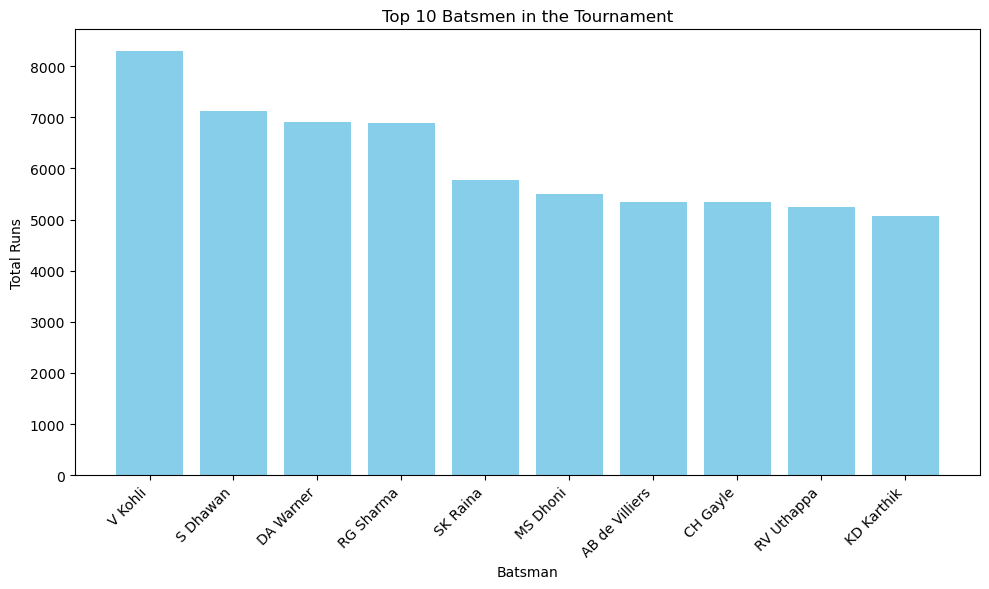

In [44]:
import matplotlib.pyplot as plt
batsman_runs = df.groupby('batter')['total_runs'].sum()
# Get the top 10 batsmen
top_10_batsman = batsman_runs.sort_values(ascending=False).head(10)
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_10_batsman.index, top_10_batsman.values, color='skyblue')
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.title("Top 10 Batsmen in the Tournament")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

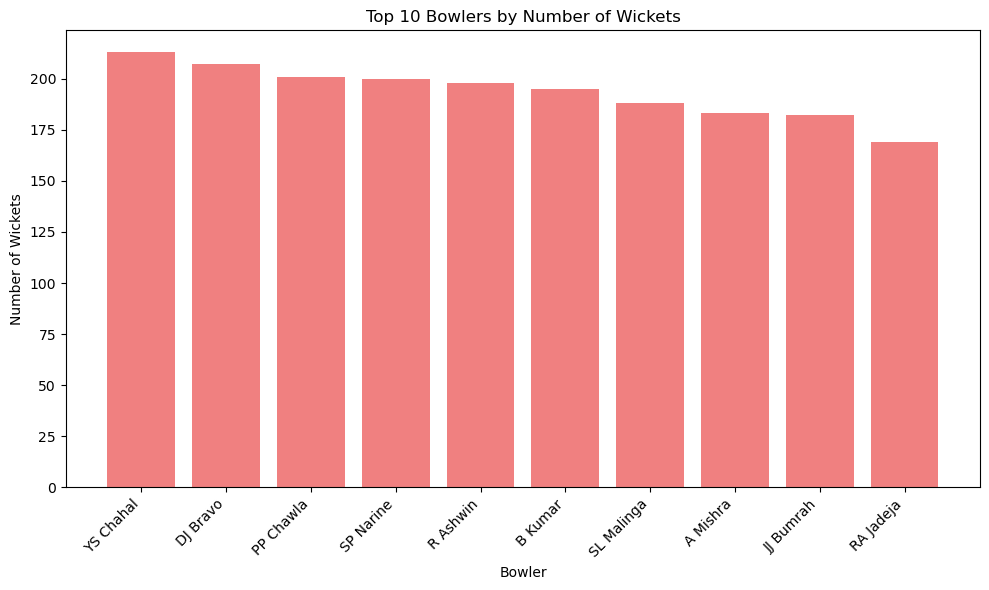

In [49]:
bowler_wickets = df.groupby('bowler')['player_dismissed'].count()
# Get the top 10 bowlers
top_10_bowlers = bowler_wickets.sort_values(ascending=False).head(10)
# Create the bar plot for top bowlers
plt.figure(figsize=(10, 6))
plt.bar(top_10_bowlers.index, top_10_bowlers.values, color='lightcoral')
plt.xlabel("Bowler")
plt.ylabel("Number of Wickets")
plt.title("Top 10 Bowlers by Number of Wickets")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout()
plt.show()

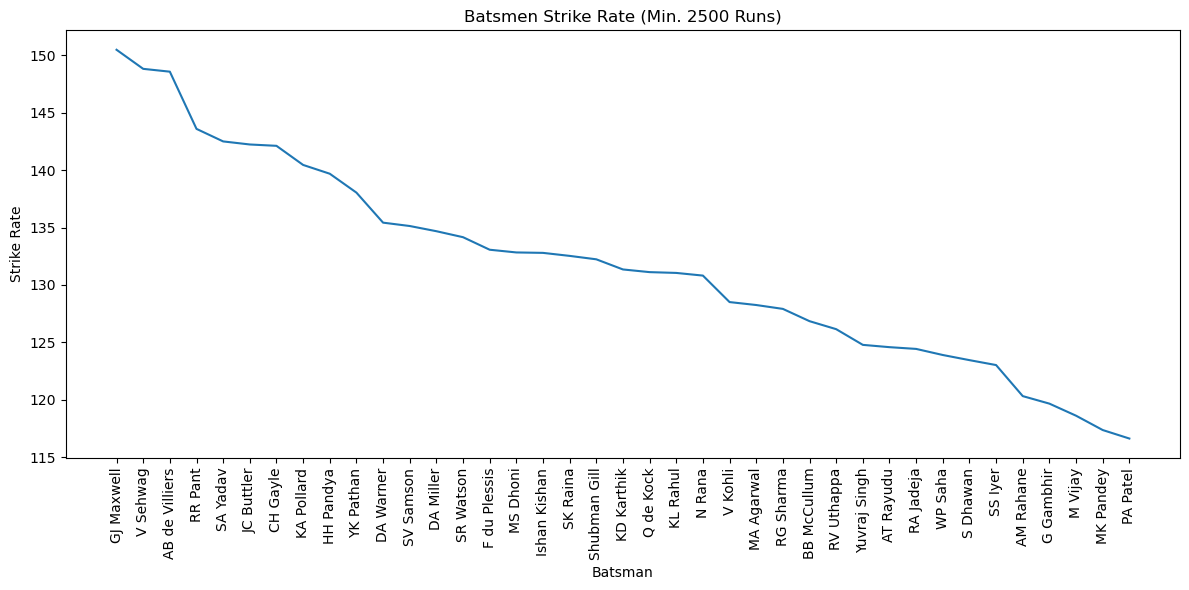

In [50]:
batsman_stats = df.groupby('batter')['batsman_runs'].agg(['sum', 'count'])
batsman_stats.rename(columns={'sum': 'runs', 'count': 'balls_faced'}, inplace=True)
batsman_stats['strike_rate'] = (batsman_stats['runs'] / batsman_stats['balls_faced']) * 100
min_target_runs = 2500  
filtered_batsmen = batsman_stats[batsman_stats['runs'] >= min_target_runs]
sorted_batsmen = filtered_batsmen.sort_values('strike_rate', ascending=False)

plt.figure(figsize=(12, 6))
plt.plot(sorted_batsmen.index, sorted_batsmen['strike_rate'])

plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.title(f'Batsmen Strike Rate (Min. {min_target_runs} Runs)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
       


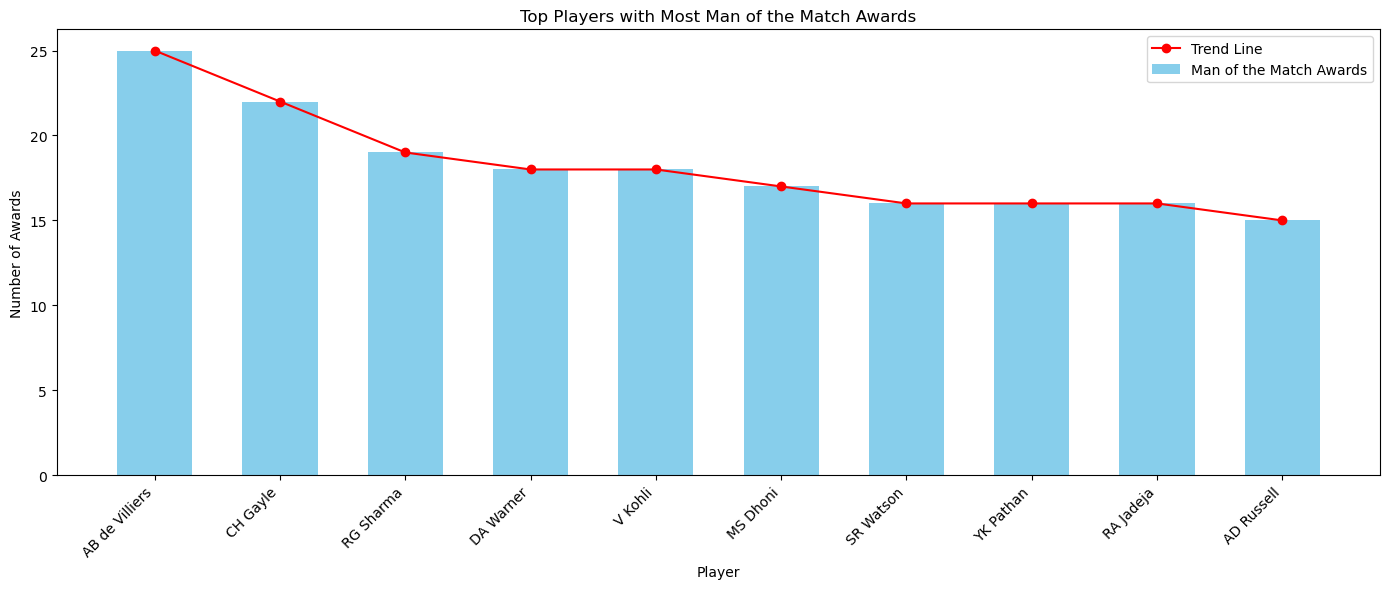

In [52]:
player_awards =df1.groupby('player_of_match')['player_of_match'].count().sort_values(ascending=False)
player_awards_df = player_awards.reset_index(name='awards')
player_awards_df.rename(columns={'player_of_match':'player'},inplace=True)
top_players = player_awards_df.head(10)

plt.figure(figsize=(14, 6))
plt.bar(top_players['player'], top_players['awards'], label='Man of the Match Awards', width=0.6, color='skyblue')
plt.plot(top_players['player'], top_players['awards'], marker='o', color='red', linestyle='-', label='Trend Line')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.title('Top Players with Most Man of the Match Awards')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\vansh\AppData\Local\Temp\ipykernel_30220\1846505997.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_bowlers['economy_rate'] = (qualified_bowlers['total_runs'] / (qualified_bowlers['balls_bowled'] / 6))


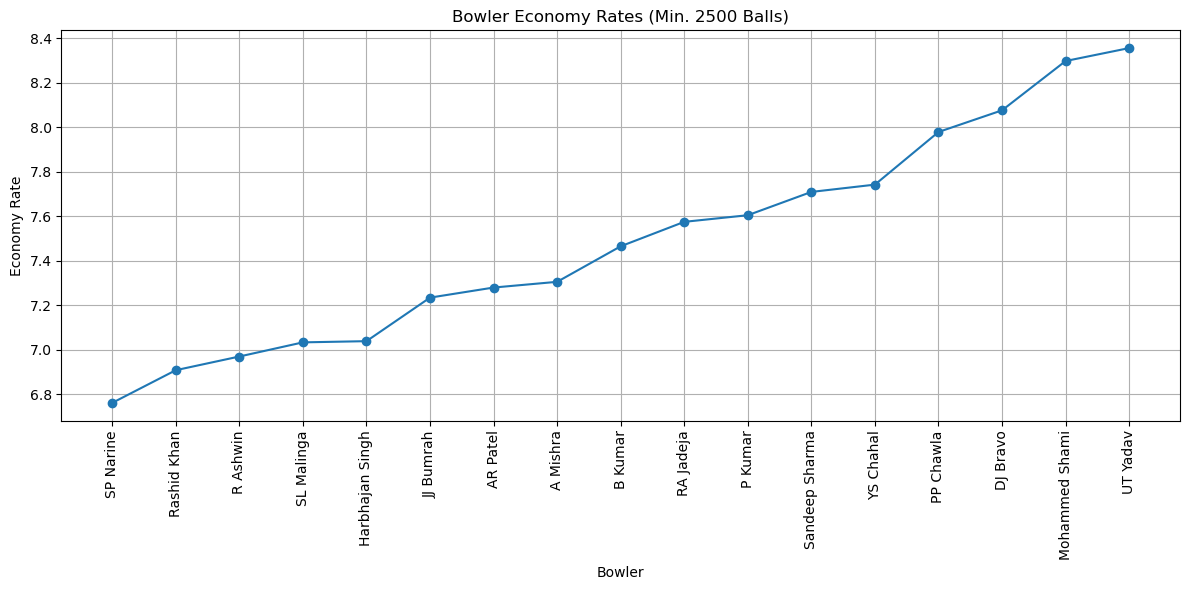

In [53]:
bowler_stats =df.groupby('bowler').agg(
    total_runs=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
)

min_balls_threshold = 2500
qualified_bowlers = bowler_stats[bowler_stats['balls_bowled'] >= min_balls_threshold]


qualified_bowlers['economy_rate'] = (qualified_bowlers['total_runs'] / (qualified_bowlers['balls_bowled'] / 6))


sorted_bowlers = qualified_bowlers.sort_values('economy_rate')



plt.figure(figsize=(12, 6))
plt.plot(sorted_bowlers.index, sorted_bowlers['economy_rate'], marker='o', linestyle='-')
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.title("Bowler Economy Rates (Min. {} Balls)".format(min_balls_threshold))
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout() 
plt.show()

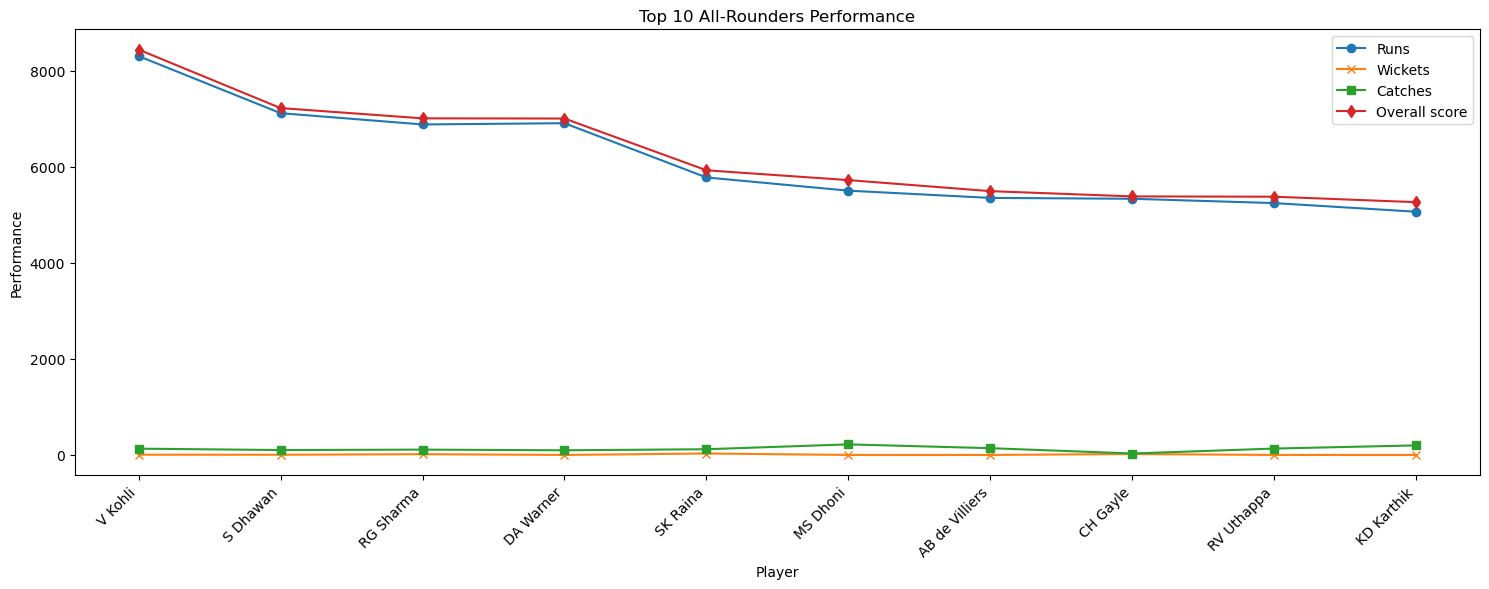

In [55]:
bowler_stats = df.groupby('bowler').agg(
    wickets=('dismissal_kind', 'count'),
    runs_conceded=('total_runs', 'sum'),
    balls_bowled=('ball', 'count')
).reset_index()
bowler_stats['economy'] = bowler_stats['runs_conceded'] / (bowler_stats['balls_bowled'] / 6)
batter_stats = df.groupby('batter').agg(
    runs=('total_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()
batter_stats['strike_rate'] = (batter_stats['runs'] / batter_stats['balls_faced']) * 100
fielder_stats = df[df['fielder'].notnull()].groupby('fielder')['fielder'].count().reset_index(name='catches')
allrounder_stats = pd.merge(batter_stats, bowler_stats, left_on='batter', right_on='bowler', how='outer')
allrounder_stats = pd.merge(allrounder_stats, fielder_stats, left_on='batter', right_on='fielder', how='outer').fillna(0)
allrounder_stats['overall_score'] = allrounder_stats['runs'] + allrounder_stats['wickets'] + allrounder_stats['catches']
top_10_allrounders = allrounder_stats.nlargest(10, 'overall_score')
plt.figure(figsize=(15, 6))

plt.plot(top_10_allrounders['batter'], top_10_allrounders['runs'], label='Runs', marker='o')
plt.plot(top_10_allrounders['batter'], top_10_allrounders['wickets'], label='Wickets', marker='x')
plt.plot(top_10_allrounders['batter'], top_10_allrounders['catches'], label='Catches', marker='s')
plt.plot(top_10_allrounders['batter'], top_10_allrounders['overall_score'], label='Overall score', marker='d')

plt.xlabel("Player")
plt.ylabel("Performance")
plt.title("Top 10 All-Rounders Performance")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

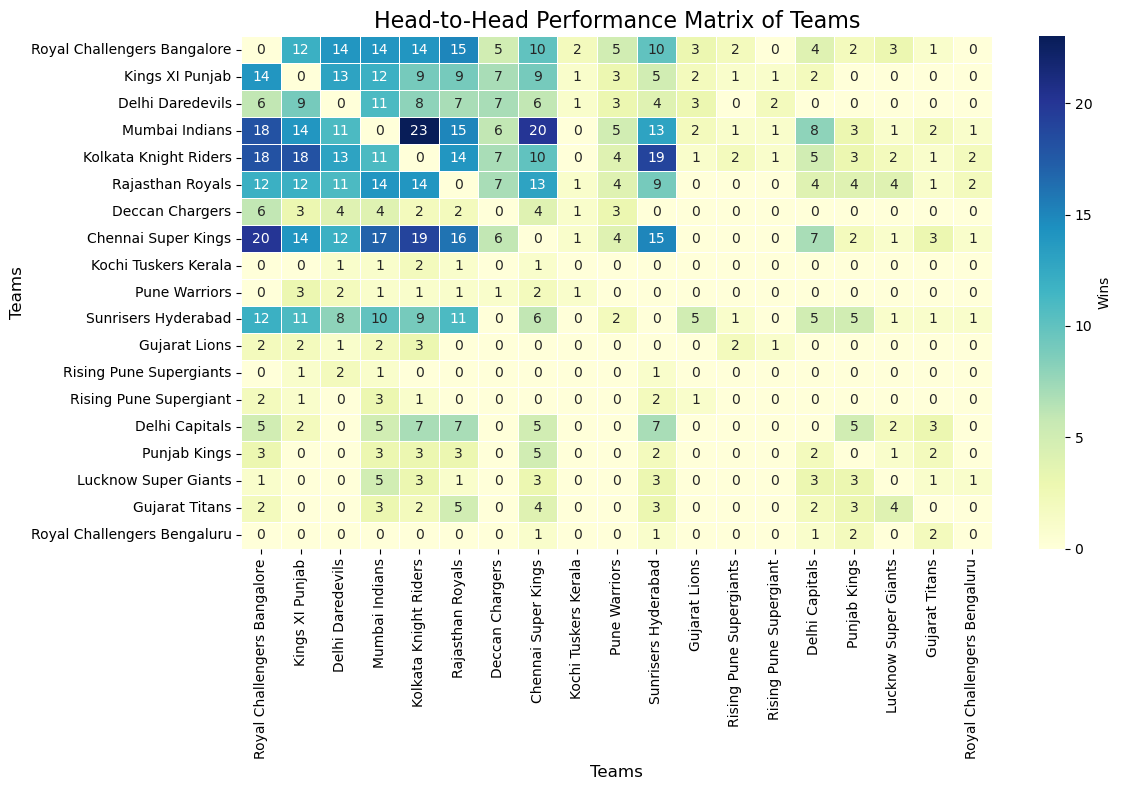

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


teams = pd.concat([df1['team1'], df1['team2']]).unique()
head_to_head_matrix = pd.DataFrame(0, index=teams, columns=teams)

for index, row in df1.iterrows():  
    winner = row['winner']
    if winner == row['team1']:
        head_to_head_matrix.loc[row['team1'], row['team2']] += 1
    elif winner == row['team2']:
        head_to_head_matrix.loc[row['team2'], row['team1']] += 1

plt.figure(figsize=(12, 8))
sns.heatmap(head_to_head_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar_kws={'label': 'Wins'}, linewidths=0.5)
plt.title("Head-to-Head Performance Matrix of Teams", fontsize=16) 
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Teams", fontsize=12)
plt.tight_layout()
plt.show()